 # CO<sub>2</sub> emission data exploration

In [45]:
import pandas as pd
from os import path
import numpy as np
import plotly.express as px
import seaborn as sns

In [6]:
df = pd.read_csv(path.join("..","data", "carbon_dioxide", "co2_yearly_ipcc_total.csv"))
df.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
0,Non-Annex_I,Rest Central America,ABW,Aruba,CO2,95.065424,94.503709,105.847814,109.863856,99.977179,...,1637.822831,1605.689731,1633.584420,1626.234050,1597.398255,1335.792882,1366.614574,1404.705123,1166.018409,1295.818804
1,Non-Annex_I,India +,AFG,Afghanistan,CO2,3343.054709,3318.411036,3545.865063,3592.563616,4075.638761,...,14462.288815,12796.268484,12478.108782,12551.087669,11760.799383,12117.693742,12736.811832,12215.717086,12525.011330,12553.576369
2,Non-Annex_I,Southern_Africa,AGO,Angola,CO2,20393.274068,19959.926969,21860.851718,22960.875811,23436.330631,...,45747.276981,51282.174272,53677.191990,56211.792887,55507.493078,51285.300069,49702.305850,51343.735537,49153.126915,50275.123467
3,Non-Annex_I,Rest Central America,AIA,Anguilla,CO2,2.168292,2.168325,2.263753,2.108963,2.350261,...,26.023228,27.940512,27.896061,28.005426,28.339881,29.062445,28.222994,27.579993,22.779488,25.408720
4,Int. Aviation,Int. Aviation,AIR,Int. Aviation,CO2,169300.996554,169300.996554,179147.487130,186892.096441,179793.330898,...,472721.118697,480909.126246,496627.696509,524654.034526,548207.777357,582230.489693,609630.481638,617763.229264,338144.083387,390166.250062


## Plotting regionwise data

In [31]:
df_total_region = df.groupby("C_group_IM24_sh").sum()

/var/folders/_z/lm6fdf1s26qb2m6wt19nvk8r0000gp/T/ipykernel_40393/603424306.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_total_region = df.groupby("C_group_IM24_sh").sum()


In [32]:
df_total_region.head()

,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,Y_1975,Y_1976,Y_1977,Y_1978,Y_1979,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
C_group_IM24_sh,,,,,,,,,,,,,,,,,,,,,
Asia-Stan,2.556283e+05,2.556984e+05,2.719221e+05,2.909938e+05,3.050707e+05,3.301558e+05,3.336131e+05,3.418250e+05,3.700854e+05,3.776315e+05,...,4.666914e+05,4.834674e+05,4.323669e+05,4.028072e+05,4.220704e+05,4.395175e+05,4.471623e+05,4.480447e+05,4.336403e+05,4.473269e+05
Brazil,3.459452e+05,3.460958e+05,3.610437e+05,3.808429e+05,3.942012e+05,4.013910e+05,4.234620e+05,4.371413e+05,4.485606e+05,4.694719e+05,...,1.257872e+06,1.308278e+06,1.327140e+06,1.305983e+06,1.294381e+06,1.320760e+06,1.242590e+06,1.258196e+06,1.219112e+06,1.271690e+06
Canada,4.129747e+05,4.215819e+05,4.398792e+05,4.600528e+05,4.675385e+05,4.512126e+05,4.652706e+05,4.794172e+05,4.840217e+05,4.998997e+05,...,6.532758e+05,6.680166e+05,6.746301e+05,6.702114e+05,6.639671e+05,6.759749e+05,6.878264e+05,6.893210e+05,6.293968e+05,6.433947e+05
Central Europe,1.012208e+06,1.025085e+06,1.051590e+06,1.098182e+06,1.108611e+06,1.155955e+06,1.212754e+06,1.260830e+06,1.308686e+06,1.336114e+06,...,9.677996e+05,9.466652e+05,9.187275e+05,9.384906e+05,9.552090e+05,9.833727e+05,9.839745e+05,9.563502e+05,9.031331e+05,9.297776e+05
China +,1.660987e+06,1.665339e+06,1.747061e+06,1.808372e+06,1.841725e+06,2.009247e+06,2.078706e+06,2.249255e+06,2.446209e+06,2.498186e+06,...,1.142692e+07,1.171712e+07,1.183640e+07,1.168118e+07,1.170124e+07,1.197001e+07,1.245878e+07,1.274224e+07,1.288929e+07,1.343218e+07


In [33]:
df_total_region = df_total_region.transpose()


In [43]:
px.line(df_total_region, width=800, height=500)

The graph of region is strongly influenced by the leading countries of their region.

In [44]:
df_total_region.head()

C_group_IM24_sh,Asia-Stan,Brazil,Canada,Central Europe,China +,Eastern_Africa,India +,Indonesia +,Int. Aviation,Int. Shipping,...,Oceania,Rest Central America,Rest South America,Russia +,Southeastern Asia,Southern_Africa,Turkey,USA,Ukraine +,Western_Africa
Y_1970,255628.259193,345945.212484,412974.716734,1.012208e+06,1.660987e+06,139165.136123,935415.934109,206089.108556,169300.996554,354049.018650,...,234024.353820,228952.762486,366207.615295,1.697862e+06,301842.542535,362006.995398,82787.647284,4.954642e+06,603058.710729,279128.320808
Y_1971,255698.375027,346095.812829,421581.864558,1.025085e+06,1.665339e+06,139297.893646,934285.298061,207491.237956,169300.996554,354049.018650,...,236222.981475,225008.276079,369507.486948,1.698556e+06,301084.185875,364322.080750,88774.985834,4.821465e+06,602825.885147,293752.536111
Y_1972,271922.132603,361043.688156,439879.240264,1.051590e+06,1.747061e+06,142402.254403,951086.880783,213073.442919,179147.487130,370588.803753,...,243411.504816,225627.917913,373196.950046,1.776236e+06,302579.301746,375961.912717,97386.747529,5.077339e+06,634873.889335,310942.506777
Y_1973,290993.787578,380842.922604,460052.826249,1.098182e+06,1.808372e+06,146538.915812,972507.211964,224248.578234,186892.096441,391541.383506,...,257265.489929,232551.548364,387654.321473,1.871665e+06,320563.701517,392092.246235,101314.452429,5.269575e+06,688159.816682,338932.160647
Y_1974,305070.726182,394201.200175,467538.504759,1.108611e+06,1.841725e+06,149722.321879,994971.235121,231200.872262,179793.330898,365896.176175,...,269534.327987,235329.978194,390954.510287,1.937365e+06,324201.973806,407493.183135,105718.563963,5.103906e+06,723930.877694,366413.066651


In [50]:
df_total_region_sum = df_total_region.sum()
df_total_region_sum.head()

C_group_IM24_sh
Asia-Stan         1.986238e+07
Brazil            4.009011e+07
Canada            2.946035e+07
Central Europe    5.672222e+07
China +           3.052980e+08
dtype: float64

<Axes: ylabel='Count'>

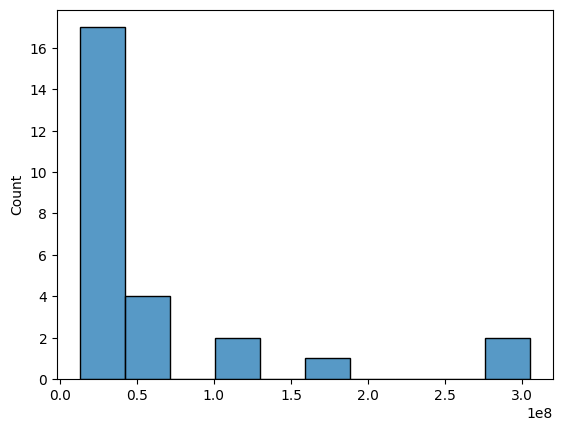

In [52]:
sns.histplot(df_total_region_sum, bins= 10)

In [55]:
px.bar(df_total_region_sum)


In [57]:
df_china = df[df["Name"] == "China"]
df_china.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
36,Non-Annex_I,China +,CHN,China,CO2,1.606950e+06,1.611013e+06,1.688336e+06,1.744502e+06,1.776667e+06,...,1.108633e+07,1.136815e+07,1.148108e+07,1.133109e+07,1.134487e+07,1.160744e+07,1.209754e+07,1.238974e+07,1.255559e+07,1.307822e+07


In [122]:
emmision_columns = list(set(df.columns) - set(["IPCC_annex", "C_group_IM24_sh", "Country_code_A3", "Name", "Substance"]))
emmision_columns                        

['Y_2019',
 'Y_2009',
 'Y_1975',
 'Y_1985',
 'Y_2000',
 'Y_1990',
 'Y_1998',
 'Y_2015',
 'Y_2004',
 'Y_2014',
 'Y_2003',
 'Y_2017',
 'Y_1972',
 'Y_2006',
 'Y_1976',
 'Y_1979',
 'Y_2016',
 'Y_1977',
 'Y_1995',
 'Y_1986',
 'Y_1980',
 'Y_2013',
 'Y_1994',
 'Y_1981',
 'Y_1996',
 'Y_1997',
 'Y_1987',
 'Y_1984',
 'Y_2001',
 'Y_1974',
 'Y_2005',
 'Y_1988',
 'Y_2012',
 'Y_1973',
 'Y_1993',
 'Y_2010',
 'Y_2020',
 'Y_2018',
 'Y_1991',
 'Y_1982',
 'Y_1971',
 'Y_2008',
 'Y_1992',
 'Y_1999',
 'Y_2002',
 'Y_2007',
 'Y_2011',
 'Y_2021',
 'Y_1983',
 'Y_1989',
 'Y_1978',
 'Y_1970']

In [83]:
df_china_ts = df_china[emmision_columns].transpose()
df_china_ts.reset_index(inplace=True)
df_china_ts["index"] = df_china_ts["index"].apply(lambda x : int(x[2:]))
df_china_ts = df_china_ts.sort_values("index")
df_china_ts["index"] = pd.to_datetime(df_china_ts["index"], format='%Y')
df_china_ts = df_china_ts.set_index("index")
df_china_ts.head()

,36
index,
1970-01-01,1.606950e+06
1971-01-01,1.611013e+06
1972-01-01,1.688336e+06
1973-01-01,1.744502e+06
1974-01-01,1.776667e+06


In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

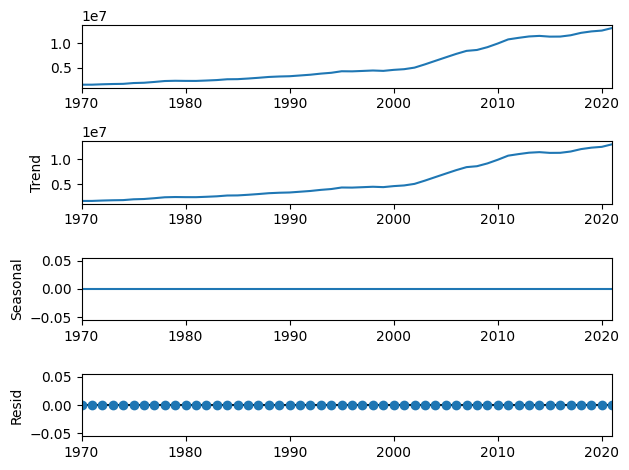

In [84]:
result_add_china = seasonal_decompose(df_china_ts, model='additive')
result_add_china.plot();

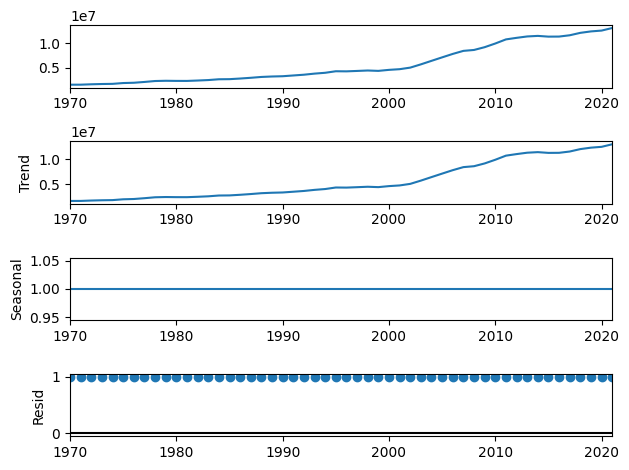

In [89]:
result_mul_china = seasonal_decompose(df_china_ts, model='multiplicative')
result_mul_china.plot();

In [86]:
from statsmodels.tsa.stattools import adfuller

In [88]:
adfuller(df_china_ts[36])[1]

0.9942226566121948

Our timeseries in not stationary

In [94]:
result_add_china.resid

index
1970-01-01    0.0
1971-01-01    0.0
1972-01-01    0.0
1973-01-01    0.0
1974-01-01    0.0
1975-01-01    0.0
1976-01-01    0.0
1977-01-01    0.0
1978-01-01    0.0
1979-01-01    0.0
1980-01-01    0.0
1981-01-01    0.0
1982-01-01    0.0
1983-01-01    0.0
1984-01-01    0.0
1985-01-01    0.0
1986-01-01    0.0
1987-01-01    0.0
1988-01-01    0.0
1989-01-01    0.0
1990-01-01    0.0
1991-01-01    0.0
1992-01-01    0.0
1993-01-01    0.0
1994-01-01    0.0
1995-01-01    0.0
1996-01-01    0.0
1997-01-01    0.0
1998-01-01    0.0
1999-01-01    0.0
2000-01-01    0.0
2001-01-01    0.0
2002-01-01    0.0
2003-01-01    0.0
2004-01-01    0.0
2005-01-01    0.0
2006-01-01    0.0
2007-01-01    0.0
2008-01-01    0.0
2009-01-01    0.0
2010-01-01    0.0
2011-01-01    0.0
2012-01-01    0.0
2013-01-01    0.0
2014-01-01    0.0
2015-01-01    0.0
2016-01-01    0.0
2017-01-01    0.0
2018-01-01    0.0
2019-01-01    0.0
2020-01-01    0.0
2021-01-01    0.0
Name: resid, dtype: float64

In [95]:
result_mul_china.resid

index
1970-01-01    1.0
1971-01-01    1.0
1972-01-01    1.0
1973-01-01    1.0
1974-01-01    1.0
1975-01-01    1.0
1976-01-01    1.0
1977-01-01    1.0
1978-01-01    1.0
1979-01-01    1.0
1980-01-01    1.0
1981-01-01    1.0
1982-01-01    1.0
1983-01-01    1.0
1984-01-01    1.0
1985-01-01    1.0
1986-01-01    1.0
1987-01-01    1.0
1988-01-01    1.0
1989-01-01    1.0
1990-01-01    1.0
1991-01-01    1.0
1992-01-01    1.0
1993-01-01    1.0
1994-01-01    1.0
1995-01-01    1.0
1996-01-01    1.0
1997-01-01    1.0
1998-01-01    1.0
1999-01-01    1.0
2000-01-01    1.0
2001-01-01    1.0
2002-01-01    1.0
2003-01-01    1.0
2004-01-01    1.0
2005-01-01    1.0
2006-01-01    1.0
2007-01-01    1.0
2008-01-01    1.0
2009-01-01    1.0
2010-01-01    1.0
2011-01-01    1.0
2012-01-01    1.0
2013-01-01    1.0
2014-01-01    1.0
2015-01-01    1.0
2016-01-01    1.0
2017-01-01    1.0
2018-01-01    1.0
2019-01-01    1.0
2020-01-01    1.0
2021-01-01    1.0
Name: resid, dtype: float64

In [96]:
print('additive resid: ', adfuller(result_add_china.resid)[1])
print('multiplicative resid: ', adfuller(result_mul_china.resid)[1])

additive resid:  nan
multiplicative resid:  nan


/Users/nandkishore/.pyenv/versions/3.10.6/envs/CO2_Emission_Indicator/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning:

divide by zero encountered in log

/Users/nandkishore/.pyenv/versions/3.10.6/envs/CO2_Emission_Indicator/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning:

divide by zero encountered in log



In [99]:
from ydata_profiling.visualisation.plot import timeseries_heatmap

In [105]:
#timeseries_heatmap(dataframe=df_china_ts, entity_column=36)
df_china_ts.rename(columns={36: "emmisions"}, inplace=True)

In [109]:
df_china_ts.head()

,emmisions
index,
1970-01-01,1.606950e+06
1971-01-01,1.611013e+06
1972-01-01,1.688336e+06
1973-01-01,1.744502e+06
1974-01-01,1.776667e+06


In [110]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_china_ts, tsmode=True, sortby="index")
profile.to_file('profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]/Users/nandkishore/.pyenv/versions/3.10.6/envs/CO2_Emission_Indicator/lib/python3.10/site-packages/ydata_profiling/model/pandas/describe_timeseries_pandas.py:117: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 581.09it/s]


In [113]:
df.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
0,Non-Annex_I,Rest Central America,ABW,Aruba,CO2,95.065424,94.503709,105.847814,109.863856,99.977179,...,1637.822831,1605.689731,1633.584420,1626.234050,1597.398255,1335.792882,1366.614574,1404.705123,1166.018409,1295.818804
1,Non-Annex_I,India +,AFG,Afghanistan,CO2,3343.054709,3318.411036,3545.865063,3592.563616,4075.638761,...,14462.288815,12796.268484,12478.108782,12551.087669,11760.799383,12117.693742,12736.811832,12215.717086,12525.011330,12553.576369
2,Non-Annex_I,Southern_Africa,AGO,Angola,CO2,20393.274068,19959.926969,21860.851718,22960.875811,23436.330631,...,45747.276981,51282.174272,53677.191990,56211.792887,55507.493078,51285.300069,49702.305850,51343.735537,49153.126915,50275.123467
3,Non-Annex_I,Rest Central America,AIA,Anguilla,CO2,2.168292,2.168325,2.263753,2.108963,2.350261,...,26.023228,27.940512,27.896061,28.005426,28.339881,29.062445,28.222994,27.579993,22.779488,25.408720
4,Int. Aviation,Int. Aviation,AIR,Int. Aviation,CO2,169300.996554,169300.996554,179147.487130,186892.096441,179793.330898,...,472721.118697,480909.126246,496627.696509,524654.034526,548207.777357,582230.489693,609630.481638,617763.229264,338144.083387,390166.250062


In [121]:
emmision_columns.append("Name")
emmision_columns


['Y_2019',
 'Y_2009',
 'Y_1975',
 'Y_1985',
 'Y_2000',
 'Y_1990',
 'Y_1998',
 'Y_2015',
 'Y_2004',
 'Y_2014',
 'Y_2003',
 'Y_2017',
 'Y_1972',
 'Y_2006',
 'Y_1976',
 'Y_1979',
 'Y_2016',
 'Y_1977',
 'Y_1995',
 'Y_1986',
 'Y_1980',
 'Y_2013',
 'Y_1994',
 'Y_1981',
 'Y_1996',
 'Y_1997',
 'Y_1987',
 'Y_1984',
 'Y_2001',
 'Y_1974',
 'Y_2005',
 'Y_1988',
 'Y_2012',
 'Y_1973',
 'Y_1993',
 'Y_2010',
 'Y_2020',
 'Y_2018',
 'Y_1991',
 'Y_1982',
 'Y_1971',
 'Y_2008',
 'Y_1992',
 'Y_1999',
 'Y_2002',
 'Y_2007',
 'Y_2011',
 'Y_2021',
 'Y_1983',
 'Y_1989',
 'Y_1978',
 'Y_1970',
 'Name',
 'Name',
 'Name']

In [137]:
df_req_col = df[emmision_columns + ["Name"]]
df_req_col.head()

,Y_2019,Y_2009,Y_1975,Y_1985,Y_2000,Y_1990,Y_1998,Y_2015,Y_2004,Y_2014,...,Y_1999,Y_2002,Y_2007,Y_2011,Y_2021,Y_1983,Y_1989,Y_1978,Y_1970,Name
0,1404.705123,1387.899058,114.650537,118.871134,950.988094,531.673589,839.623484,1626.234050,1338.638889,1633.584420,...,886.536977,996.511790,1369.656688,1286.369279,1295.818804,104.994149,522.596351,115.610136,95.065424,Aruba
1,12215.717086,10791.187530,3968.135977,5632.903237,3504.449671,4315.742439,4036.375669,12551.087669,4027.989583,12478.108782,...,3884.130274,3967.050030,5880.817069,15573.224097,12553.576369,4637.964440,4318.738932,3871.999215,3343.054709,Afghanistan
2,51343.735537,42655.564104,22666.196272,27616.242673,34104.669590,26025.382685,34310.556491,56211.792887,36788.078823,53677.191990,...,35354.810082,34324.976979,37491.020928,46455.168480,50275.123467,26293.854273,29702.183130,26410.708507,20393.274068,Angola
3,27.579993,20.160958,2.584030,3.670826,15.531534,6.114424,12.448764,28.005426,13.471890,27.896061,...,11.750832,10.858915,12.354729,26.008055,25.408720,6.088891,6.148498,2.901614,2.168292,Anguilla
4,617763.229264,434205.492253,173866.019591,225156.168309,352628.829209,258993.781258,326243.075691,524654.034526,393904.639907,496627.696509,...,340142.087101,366703.238307,448063.493232,472112.408264,390166.250062,211187.450018,290296.645404,197222.627759,169300.996554,Int. Aviation


In [138]:
df_req_col = df_req_col.set_index("Name").transpose()

In [143]:
df_req_col.reset_index(inplace= True)

In [148]:
df_req_col.rename(columns={"index": "Year"}, inplace= True)

In [150]:
df_req_col["Year"] = pd.to_datetime(df_req_col["Year"], format='Y_%Y')
df_req_col.head()

Name,Year,Aruba,Afghanistan,Angola,Anguilla,Int. Aviation,Albania,Netherlands Antilles,United Arab Emirates,Argentina,...,Saint Vincent and the Grenadines,Venezuela,Virgin Islands_British,Viet Nam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
0,2019-01-01,1404.705123,12215.717086,51343.735537,27.579993,617763.229264,6153.321435,2210.519648,199501.782292,272683.395390,...,304.020681,125210.462485,208.326191,443598.625813,314.464921,416.092691,12840.573918,520574.310438,35725.327086,45146.571907
1,2009-01-01,1387.899058,10791.187530,42655.564104,20.160958,434205.492253,5322.543477,5986.949446,165719.154926,223378.374680,...,537.514801,174208.560489,361.381062,257377.282155,255.142407,336.116667,28190.055210,520278.776326,25399.303039,36930.882052
2,1975-01-01,114.650537,3968.135977,22666.196272,2.584030,173866.019591,7114.455431,10199.666398,36642.268835,122996.110217,...,138.948748,69674.121861,38.242687,77850.250222,118.816711,130.856474,3042.429702,295934.483229,14370.518775,30236.857791
3,1985-01-01,118.871134,5632.903237,27616.242673,3.670826,225156.168309,9829.803811,4502.375650,51833.733900,130158.110924,...,125.435099,101245.189820,37.360465,93990.044235,139.773835,165.211939,6036.832704,355917.227893,15553.216300,36652.508300
4,2000-01-01,950.988094,3504.449671,34104.669590,15.531534,352628.829209,4459.571897,5670.832893,88602.097920,188652.271990,...,227.133434,149604.502082,135.113044,168021.496941,194.024892,276.283025,16223.514942,422138.759141,20370.187497,46184.164109


In [153]:
df_req_col.sort_values("Year", inplace=True)
df_req_col.reset_index()
df_req_col.head()

Name,Year,Aruba,Afghanistan,Angola,Anguilla,Int. Aviation,Albania,Netherlands Antilles,United Arab Emirates,Argentina,...,Saint Vincent and the Grenadines,Venezuela,Virgin Islands_British,Viet Nam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
51,1970-01-01,95.065424,3343.054709,20393.274068,2.168292,169300.996554,6495.392463,14518.577946,19437.564124,117798.023151,...,153.998420,65974.396109,32.466682,73122.082488,94.170957,110.571074,2279.019675,242569.025663,11599.319294,29153.165073
40,1971-01-01,94.503709,3318.411036,19959.926969,2.168325,169300.996554,6496.586020,14518.623166,25404.107710,119174.357168,...,149.854652,64624.354232,32.490949,73147.913091,94.557474,110.281211,2319.594798,244052.727460,12042.771011,29673.548342
12,1972-01-01,105.847814,3545.865063,21860.851718,2.263753,179147.487130,7188.642875,14117.447258,27718.760512,120834.014219,...,132.728706,65629.141793,35.261511,74099.275937,99.740841,114.783156,2563.365542,252271.388813,12933.317171,29766.298063
33,1973-01-01,109.863856,3592.563616,22960.875811,2.108963,186892.096441,6638.229748,15611.532512,35806.205491,125833.446621,...,138.182002,73464.735520,37.552230,77467.172827,116.631148,128.914496,3022.129423,266223.723178,13239.359062,30429.616577
29,1974-01-01,99.977179,4075.638761,23436.330631,2.350261,179793.330898,7019.793539,14126.876826,35971.039274,125787.379492,...,141.967601,72875.328260,34.622912,75268.378293,139.050865,148.390839,3012.052322,279125.575198,13691.823407,31412.988187


In [154]:
df_sorted = df_req_col

In [158]:
df_sorted.reset_index(drop= True, inplace= True)
df_sorted.set_index(keys="Year", inplace= True)

In [170]:
df_emmision_decade=df_sorted.groupby(df_sorted.index.year//10).mean()

In [162]:
df_emmision_decade

Name,Aruba,Afghanistan,Angola,Anguilla,Int. Aviation,Albania,Netherlands Antilles,United Arab Emirates,Argentina,Armenia,...,Saint Vincent and the Grenadines,Venezuela,Virgin Islands_British,Viet Nam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
197,1063.464025,37678.437642,227397.193028,24.729791,1.823841e+06,74658.764189,123391.208553,3.627894e+05,1.262226e+06,143196.160029,...,1382.662333,7.341946e+05,358.422216,7.635038e+05,1160.439267,1297.892266,30741.092820,2.778650e+06,135324.828331,304263.649369
198,1859.523549,46014.470764,274668.780256,54.858346,2.345311e+06,96829.937475,56747.036893,4.661811e+05,1.376398e+06,198907.715565,...,1227.792789,1.018293e+06,458.072130,9.348753e+05,1285.627872,1595.417130,60491.023179,3.482687e+06,156705.790831,365278.105293
199,7281.284430,37187.136189,301683.814449,115.052623,2.886512e+06,43689.367335,34980.238593,7.419504e+05,1.610328e+06,79012.958707,...,1745.872813,1.280058e+06,620.386077,1.262811e+06,941.043308,1935.812522,112201.860330,3.930170e+06,185508.434460,445298.303194
200,12313.877793,53327.796462,366952.530269,144.139140,4.015191e+06,51327.204448,58837.458826,1.235929e+06,2.105605e+06,44076.898611,...,3924.900725,1.629302e+06,2716.965683,2.084995e+06,2115.435736,2991.342230,216705.046088,4.820760e+06,224620.973179,419580.575768
201,14840.180121,128753.637513,505982.938588,273.083091,5.263061e+06,59689.478743,43761.691765,1.945861e+06,2.682314e+06,58779.619524,...,4790.985715,1.744238e+06,3622.676739,3.282341e+06,2720.933373,3674.408188,193133.175700,5.210397e+06,320520.207788,434483.485244
202,2461.837213,25078.587698,99428.250381,48.188208,7.283103e+05,11533.728858,3866.409171,3.831904e+05,5.385393e+05,14092.834380,...,542.636354,2.174029e+05,367.193866,8.622456e+05,639.245001,848.995647,24737.117327,9.656281e+05,73479.646526,94563.945826


In [171]:
px.line(df_emmision_decade, width=800, height=500)

/Users/nandkishore/.pyenv/versions/3.10.6/envs/CO2_Emission_Indicator/lib/python3.10/site-packages/plotly/express/_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/nandkishore/.pyenv/versions/3.10.6/envs/CO2_Emission_Indicator/lib/python3.10/site-packages/plotly/express/_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/nandkishore/.pyenv/versions/3.10.6/envs/CO2_Emission_Indicator/lib/python3.10/site-packages/plotly/express/_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  T

In [168]:
df_emmision_5_years=df_sorted.groupby(df_sorted.index.year//5).mean()

In [169]:
px.line(df_emmision_5_years, width=800, height=500)

/Users/nandkishore/.pyenv/versions/3.10.6/envs/CO2_Emission_Indicator/lib/python3.10/site-packages/plotly/express/_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/nandkishore/.pyenv/versions/3.10.6/envs/CO2_Emission_Indicator/lib/python3.10/site-packages/plotly/express/_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/nandkishore/.pyenv/versions/3.10.6/envs/CO2_Emission_Indicator/lib/python3.10/site-packages/plotly/express/_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  T